In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 25s 2us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

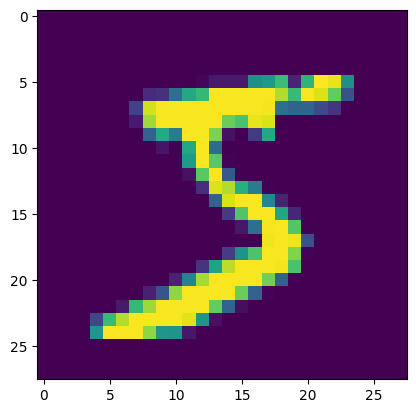

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2905 - accuracy: 0.9156 - val_loss: 0.1498 - val_accuracy: 0.9552
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1216 - accuracy: 0.9634 - val_loss: 0.1202 - val_accuracy: 0.9647
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9738 - val_loss: 0.1011 - val_accuracy: 0.9708
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0977 - val_accuracy: 0.9706
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.1077 - val_accuracy: 0.9697
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.1049 - val_accuracy: 0.9716
Epoch 7/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0860 - val_accuracy:

In [12]:
model.predict(X_test)

313/313 [==============================] - 0s 850us/step


array([[1.1643709e-20, 2.6453100e-18, 8.9396234e-17, ..., 1.0000000e+00,
        2.5775555e-24, 1.3480156e-15],
       [3.3970626e-24, 1.1973130e-16, 1.0000000e+00, ..., 5.9197988e-20,
        1.4950434e-18, 0.0000000e+00],
       [9.2318898e-19, 9.9999428e-01, 6.0590429e-11, ..., 5.6750378e-06,
        1.0213594e-09, 5.5465636e-15],
       ...,
       [8.3415375e-35, 2.4686113e-23, 1.1568421e-24, ..., 8.8458231e-18,
        2.4318414e-23, 3.5573749e-17],
       [8.2147399e-23, 8.9767233e-27, 1.0004960e-30, ..., 2.5044164e-24,
        6.0593342e-14, 1.2951162e-26],
       [2.6562411e-14, 4.7379259e-22, 7.3148930e-18, ..., 2.8159201e-24,
        4.8249416e-16, 3.8657829e-17]], dtype=float32)

In [13]:
y_prob=model.predict(X_test)

313/313 [==============================] - 0s 755us/step


In [14]:
y_pred=y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9788

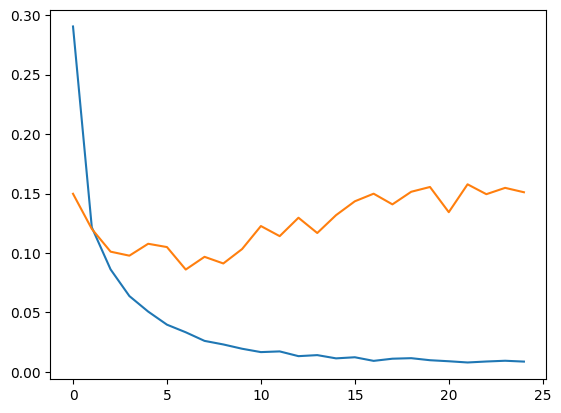

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

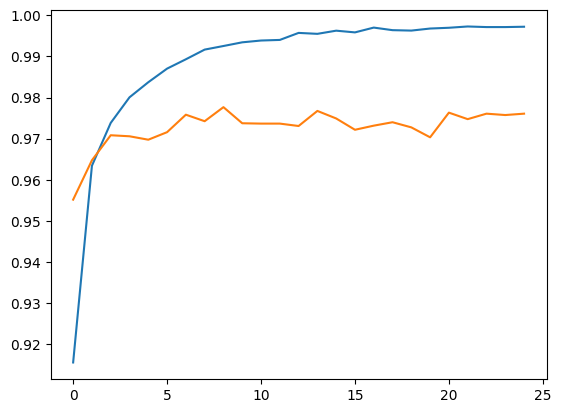

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

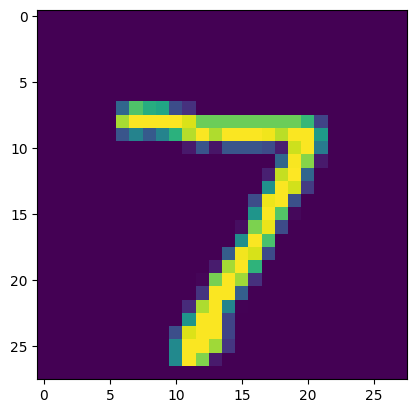

In [18]:
plt.imshow(X_test[0])

In [19]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


array([7], dtype=int64)